# Setup

In [1]:
# Common imports
import sys
import sklearn
import numpy as np

# Random Forests

A Random Forest is an ensemble of Decision Trees, generally trained via the bagging method (or sometimes pasting). It is one of the most powerful ML model architectures.


## Ensemble learning
A machine learning method where you aggregate the predictions of a group of predictors (classifiers or regressors) to get better predictions than with the best individual predictor. 

The aggregation function is typically the most frequent prediction for classification, and the average for regression.

To get better predictions than with the best individual predictor, all individual predictors must be independent. Random Forests accomplish this by training each predictor on a different random subset of the training set.


## Bagging and pasting
A random subset of the training set can be sampled in 2 ways:

1) Bagging: with replacement (also called bootstrap aggregation).<br/>
2) Pasting: without replacement (all predictors are trained on distinct subsets).

Bagging is generally the preferred, since it often results in better models.


## Out-of-Bag evaluation
When bagging is used (this is default), only about 63% of the training instances are sampled on average for each predictor. The remaining 37% of the training instances that are not sampled are called out-of-bag (oob) instances. Since a predictor never sees the oob instances during training, it can be evaluated on these instances. You can evaluate the whole forest by averaging out the oob evaluations of each predictor.


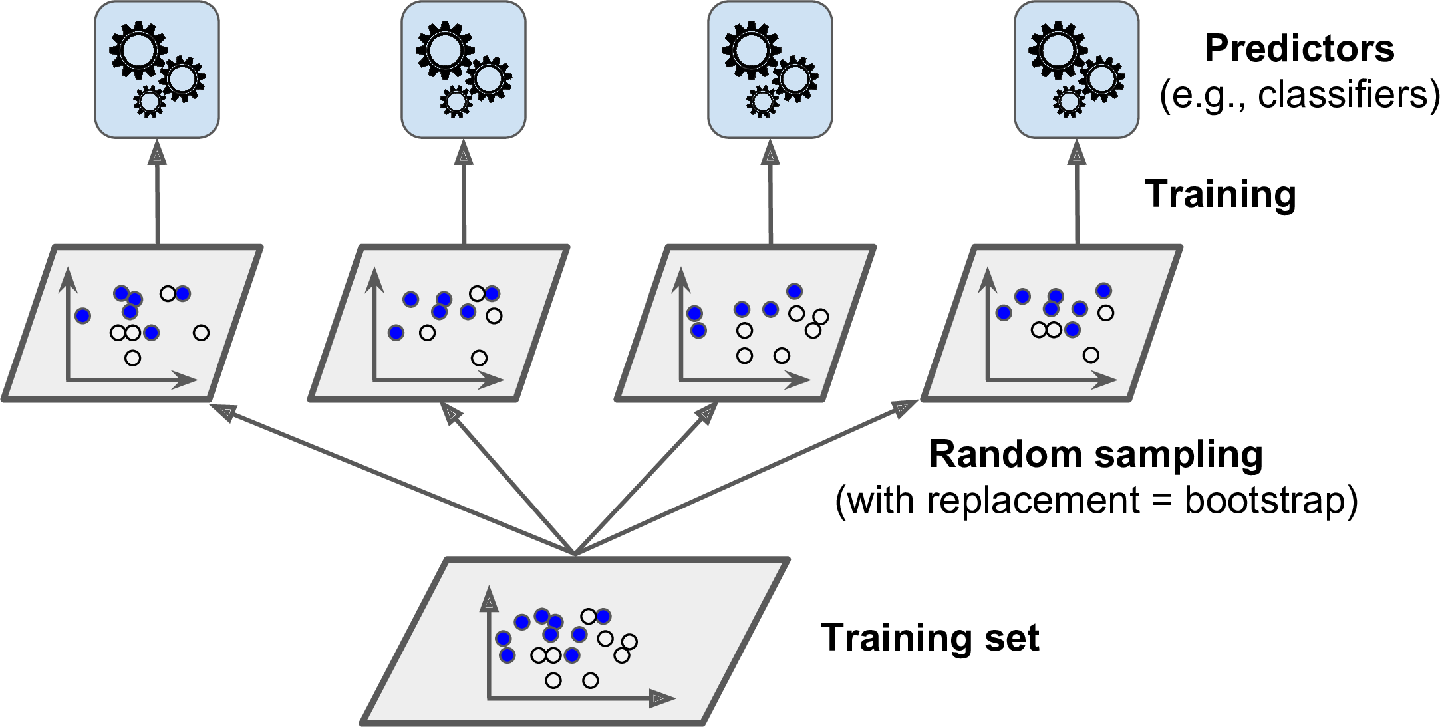

## Training and evaluating a Random Forest Classifier
Scikit-learn provides a RandomForestClassifier and a RandomForestRegressor. Here we will train and evaluate a RandomForestClassifier on the iris dataset.

### Hyperparameters
A RandomForestClassifier has almost all the hyperparameters of a DecisionTreeClassifier, and several others in addition. In the example below, the more interesting of these additional hyperparameters are demonstrated.

In [2]:
from sklearn.datasets import load_iris
from sklearn.ensemble import RandomForestClassifier

# Load the dataset
iris = load_iris()

# Train a RandomForestClassifier
# n_estimators (default=100): The number of trees in the forest.
# bootstrap (default=True): Whether to use bagging.
# oob-score (default=False): Whether to use out-of-bag evaluation.
# n_jobs (default=None): The number of jobs to run in parallel (-1 means using all processors)

rnd_clf = RandomForestClassifier(n_estimators=500, bootstrap=True, oob_score=True, n_jobs=-1, random_state=42)
rnd_clf.fit(iris["data"], iris["target"])

RandomForestClassifier(n_estimators=500, n_jobs=-1, oob_score=True,
                       random_state=42)

In [3]:
# Display the oob evaluation score:
rnd_clf.oob_score_

0.9466666666666667

In [4]:
# Display the relative importance of each feature:
# [sepal length, sepal width, petal length, petal width]
rnd_clf.feature_importances_

array([0.11249225, 0.02311929, 0.44103046, 0.423358  ])